# EMPLOYEE TURNOVER ANALYTICS
Prepared by: Vrinda Pillai
Date: 27-May-2025
Objective: Predict Employee Turnover within the company by evaluating patterns in workstyle

## 1. Data Wrangling
Load and Inspect Data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Load latest dataset for this project from Kaggle
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.shape

(14999, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# Handling missing Data
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Since there are no missing values, no further treatment is needed.

In [17]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


## 2. Data Analysis
Identify the factors contributed most to employee turnover by EDA


In [19]:
# Correlation Matrix
import numpy as np


In [21]:
df_numeric = df.select_dtypes(include=np.number)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

<Axes: >

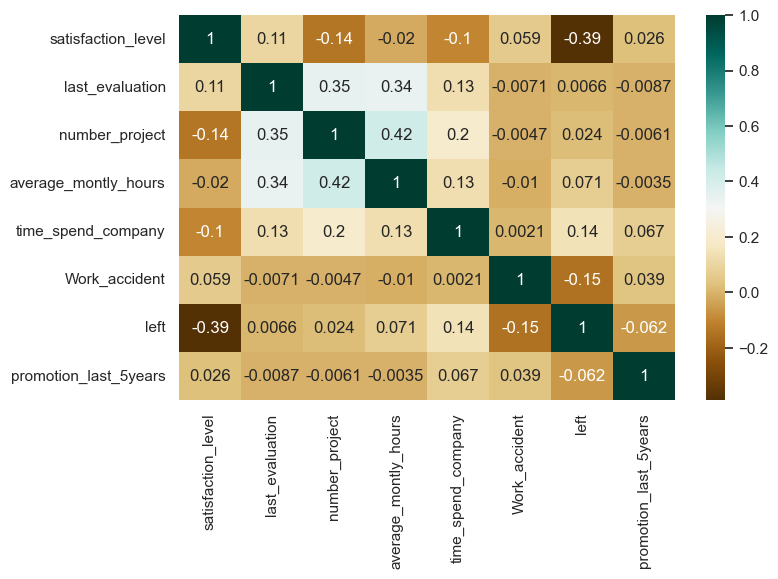

In [23]:
#relationship between variables using heatmap
corr = df_numeric.corr()
print(corr)
sns.set_theme(rc= {'figure.figsize':(8,5)})
sns.heatmap(corr,cmap='BrBG',annot=True)

1.As the Target variable in this case is 'left' there is a strong negative correlation between left and satisfaction level. Lower satisfaction is linked to employees leaving 
2.time_spend_company: 0.14, Slight positive correlation: Longer tenure might be linked to higher attrition, possibly due to stagnation.
3.average_montly_hours: 0.071 Weak correlation, but slightly positive — may indicate overwork, though the correlation is not strong.
4.Work_accident: -0.15, Mild negative correlation: Employees who had accidents are less likely to leave (possibly due to retention efforts post-accident).
5.promotion_last_5years: -0.062, Very weak negative correlation: Those who got promoted were slightly less likely to leave.
Not useful for predicting 'left':
last_evaluation: 0.007
number_project: 0.024

feature-to-feature correlations:
time spend in the company and number of projects are negatively correlated to satisfaction level. Which means satisfaction level decreases with more time spend and more number of projects. When employee is overloaded with work then satisfaction decreases and turn over increases
Average monthly hours , time spend and number of projects are positively correlated to each other.
last evaluation and satisfaction level are positively correlated

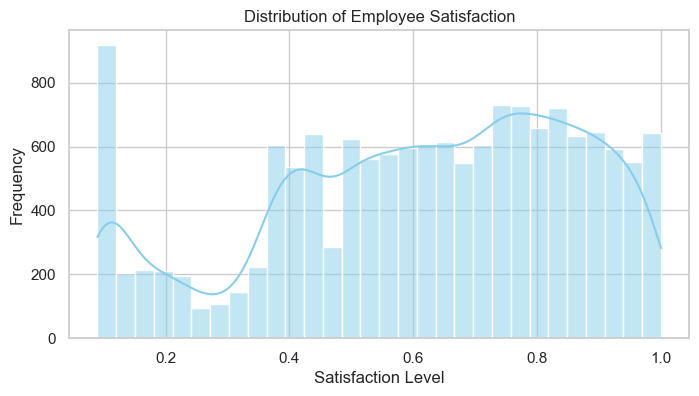

In [25]:
#Distribution plots
sns.set(style="whitegrid")
# Plot 1: Employee Satisfaction
plt.figure(figsize=(8, 4))
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue')
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

The above plot shows spike at .1 which indicates very low satisfaction and spike at .7 to.9 which indicates high satisfaction
This suggests that there are two distinct groups of employees:
Highly dissatisfied employees (likely at risk of attrition).
Highly satisfied employees (possibly stable or engaged).
Gradual Increase from 0.4–0.8:
The number of employees gradually increases in this range, forming a plateau before peaking again.
Indicates a larger cluster of moderately to highly satisfied employees.

Skew and Spread:
The distribution is spread across the full range (0 to 1).
Slight right skew with concentration in the higher satisfaction zone (above 0.5).

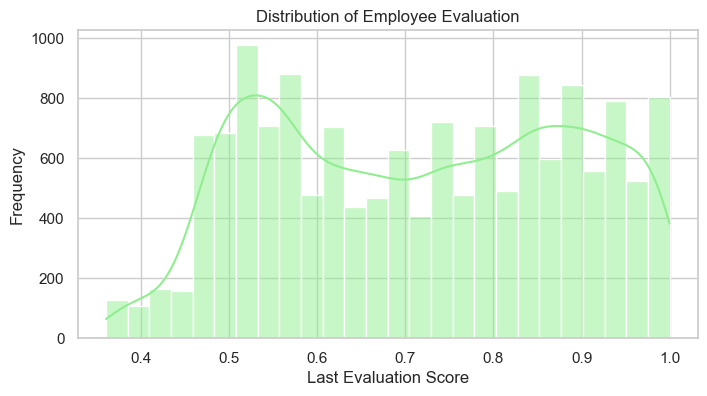

In [27]:
# Plot 2: Employee Evaluation
plt.figure(figsize=(8, 4))
sns.histplot(df['last_evaluation'], kde=True, color='lightgreen')
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Frequency')
plt.show()

Low Scores Are Rare:
Very few employees have evaluation scores below 0.4.
Implies underperformance is either rare or not tolerated, possibly leading to attrition or corrective action.
A peak appears around 0.55–0.60, indicating that a large number of employees received average evaluation scores.
After this peak, the distribution becomes more uniform or flat, particularly between 0.7 and 1.0, suggesting that many employees were evaluated highly.

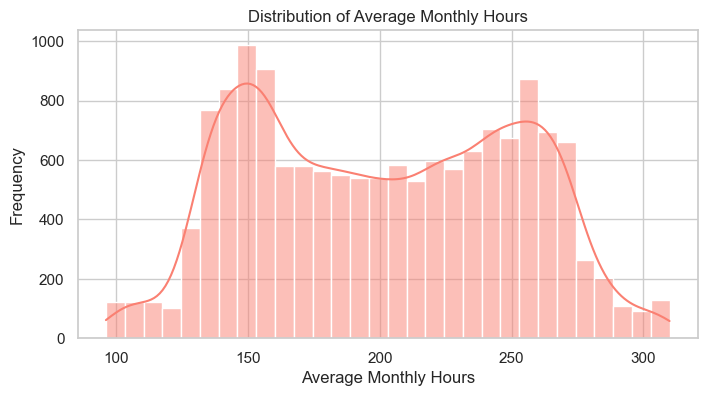

In [29]:
# Plot 3: Employee Average Monthly Hours
plt.figure(figsize=(8, 4))
sns.histplot(df['average_montly_hours'], kde=True, color='salmon')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

The graph clearly shows two peaks:

Around 150 hours

Around 250 hours

This suggests two distinct working patterns:
One group of employees is working fewer hours (~150)

Another group is working very high hours (~250)

Middle Range (~200 hours):
There is a dip in the number of employees working around 200 hours/month.
Could indicate few employees have "average" workload—they're either under-loaded or overloaded.

Long Right Tail:
A smaller number of employees work close to or beyond 300 hours per month.
These could be overworked and may correlate with attrition or burnout.

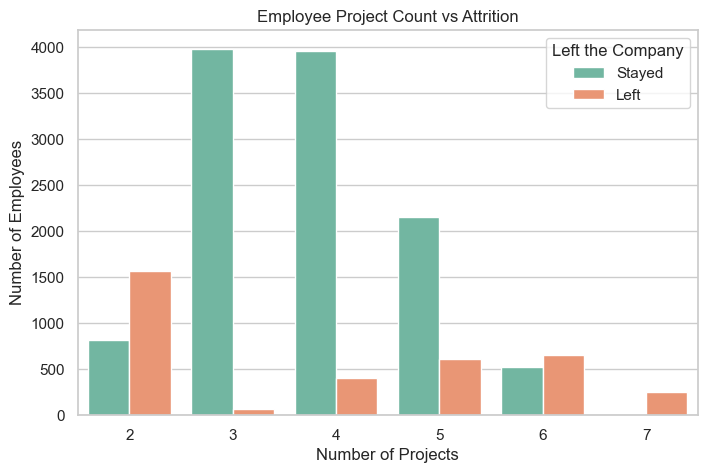

In [31]:
# Bar plot to show Employee project count of both employees who left and stayed in organization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='number_project', hue='left', palette='Set2')
plt.title('Employee Project Count vs Attrition')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left the Company', labels=['Stayed', 'Left'])
plt.show()

When Project Count = 2:A higher number of employees left than stayed.
Indicates that having too few projects may lead to dissatisfaction or underutilization.

When Project Count = 3 or 4:The majority of employees stayed.
These are the safest project load levels with the highest retention.

When Project Count = 5: Still more employees stayed, but a noticeable rise in attrition.
Indicates early signs of increasing workload stress.

When Project Count = 6:More employees left than stayed.
Clear signal that high workload is becoming a cause for employee burnout or dissatisfaction.

When Project Count = 7:
All employees with 7 projects left the company.
Strong indication that extreme workload is directly linked to attrition.

Inference:
There is a U-shaped relationship between project count and attrition:
Low (2 projects) and high (6–7 projects) → Higher attrition.
Moderate (3–4 projects) → Lower attrition and better retention.
Actionable Insights:
Ideal workload: Maintain employee project count around 3–4.
Watch for extremes:
Underworked (2 projects) might feel undervalued or unchallenged.
Overworked (6–7 projects) are at high risk of leaving.
HR and team leads should monitor project assignments to reduce both under- and over-utilization.



## 3. Data Clustering

In [33]:
from sklearn.cluster import KMeans

In [35]:
# Filter employees who left
df_left = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [37]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_left['Cluster'] = kmeans.fit_predict(df_left)

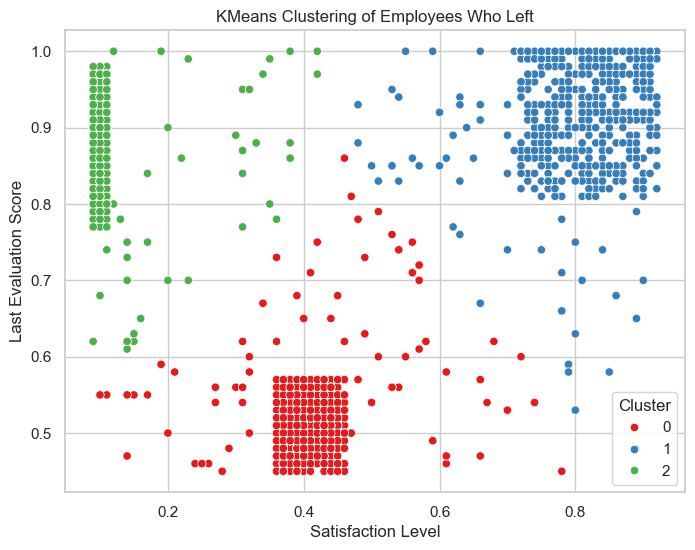

In [39]:
# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='satisfaction_level', 
    y='last_evaluation', 
    hue='Cluster', 
    data=df_left, 
    palette='Set1'
)
plt.title('KMeans Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.grid(True)
plt.show()

Cluster Summary:
Cluster	 Satisfaction	Evaluation	    Characteristics	                                 Possible Reasons for Attrition
0 (Red)	 Low–Medium	    Low–Medium	    Unhappy and underperforming	                     Lack of engagement or development opportunities
1 (Blue) High	        High	        Happy and top-performing	                     Burnout, no promotion, external offers
2 (Green)Very Low	    Very High	    Dissatisfied despite excellent performance	     Feeling undervalued,toxic work culture 

Cluster 0: Low satisfaction, low evaluation — likely underperformers

Cluster 1: High satisfaction, high evaluation — critical loss of top talent

Cluster 2: Very low satisfaction, high evaluation — disengaged high performers

## 4. SMOTE technique

In [41]:
pip install pandas scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [45]:
X = df.drop('left', axis=1)  
y = df['left']

In [47]:
# Separate categorical and numeric variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [49]:
# Apply get_dummies() to categorical variables
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)
X_numeric = X[numeric_cols]

In [51]:
# Combine categorical and numeric variables
X_processed = pd.concat([X_numeric, X_categorical], axis=1)


In [53]:
# 4.2 Stratified split of the dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=123
)

In [55]:
# 4.3 Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [57]:
# Check class distribution
print("Original training target class distribution:")
print(y_train.value_counts())
print("\nResampled training target class distribution:")
print(y_train_resampled.value_counts())

Original training target class distribution:
left
0    9142
1    2857
Name: count, dtype: int64

Resampled training target class distribution:
left
0    9142
1    9142
Name: count, dtype: int64


Summary of the Result:
Before SMOTE:
Class 0: 9142 samples
Class 1: 2857 samples (minority)
After SMOTE:
Class 0: 9142 samples
Class 1: 9142 samples (upsampled to match class 0)
output confirms that SMOTE has successfully handled the class imbalance in training data:

## 5-Fold cross-validation model training and performance evaluation

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [64]:
# Reuse resampled data
X_cv, y_cv = X_train_resampled, y_train_resampled

In [66]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123)
}

In [68]:
# 5-Fold Stratified CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)


 Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



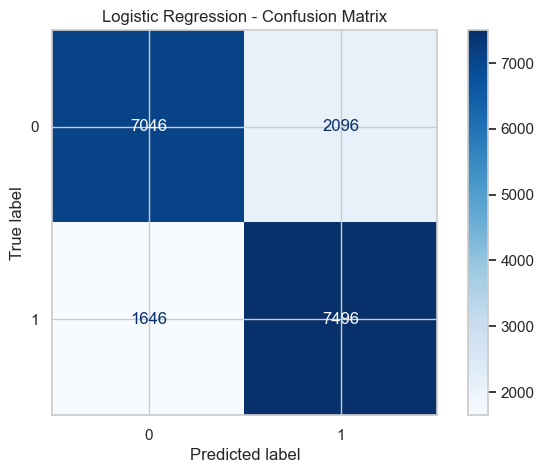


 Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.99      0.98      0.98     18284
weighted avg       0.99      0.98      0.98     18284



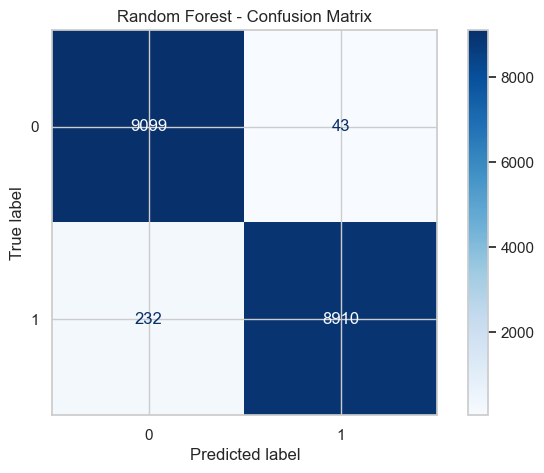


 Model: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



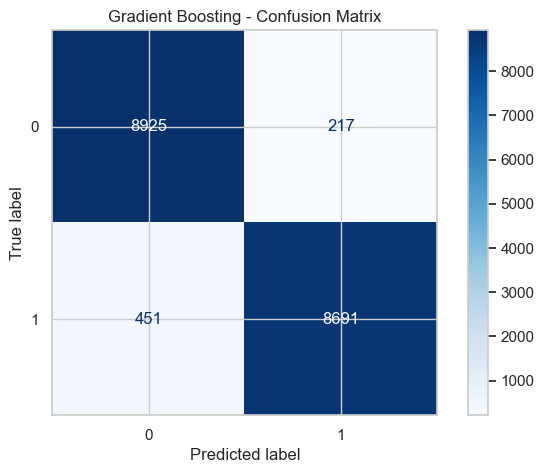

In [70]:
# Function to train and evaluate models
def evaluate_model(name, model, X, y):
    print(f"\n Model: {name}")
    
    # Cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Blues")
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.show()

# Run evaluation for each model
for model_name, model in models.items():
    evaluate_model(model_name, model, X_cv, y_cv)

1. Confusion Matrix Summary for Logistic regression:
True Positives (TP) = 7496 → correctly predicted employees who left

True Negatives (TN) = 7046 → correctly predicted employees who stayed

False Positives (FP) = 2096 → predicted they would leave but they stayed

False Negatives (FN) = 1646 → predicted they would stay but they left
High Recall for Class 1 (Left): 7496 / (7496 + 1646) ≈ 82%
Good at catching employees who are likely to leave.
Moderate False Alarm Rate: 2096 false positives — could affect interventions based on false attrition risks.

2.Confusion Matrix Summary for Random Forest:
True Positives (TP) = 8910  → correctly predicted employees who left

True Negatives (TN) = 9099 → correctly predicted employees who stayed

False Positives (FP) = 43→ predicted they would leave but they stayed

False Negatives (FN) = 232 → predicted they would stay but they left

Interpretation:
Accuracy = (TP + TN) / Total = (8910 + 9099) / 18284 ≈ 98.3%
Recall for class 1 (Left) = 8910 / (8910 + 232) ≈ 97.5%
Precision for class 1 (Left) = 8910 / (8910 + 43) ≈ 99.5%
Near-perfect prediction for employees who stayed.
Strong performance for employees who left, with minimal false negatives.
3.Confusion Matrix Summary for Gradient Boosting:
True Negatives (TN) = 8925
False Positives (FP) = 217
False Negatives (FN) = 451
True Positives (TP) = 8691

Key Calculations:
Accuracy = (TP + TN) / Total = (8691 + 8925) / 18284 ≈ 96%
Precision (Class 1) = 8691 / (8691 + 217) ≈ 0.98
Recall (Class 1) = 8691 / (8691 + 451) ≈ 0.95
F1-Score (Class 1) ≈ 0.96

Interpretation:
Very high precision for predicting attrition (class 1) — few false alarms.
Slight drop in recall compared to Random Forest — missed more who actually left.
Balanced performance, nearly matching classification report — solid second-best model.

Observations:
Random Forest leads in almost every metric — especially precision and F1.
Gradient Boosting is slightly more balanced but with a small dip in recall for “left” class.
Logistic Regression lags behind — useful for interpretability but not optimal here.

## 6. ROC Curve

In [73]:
from sklearn.metrics import roc_curve, auc

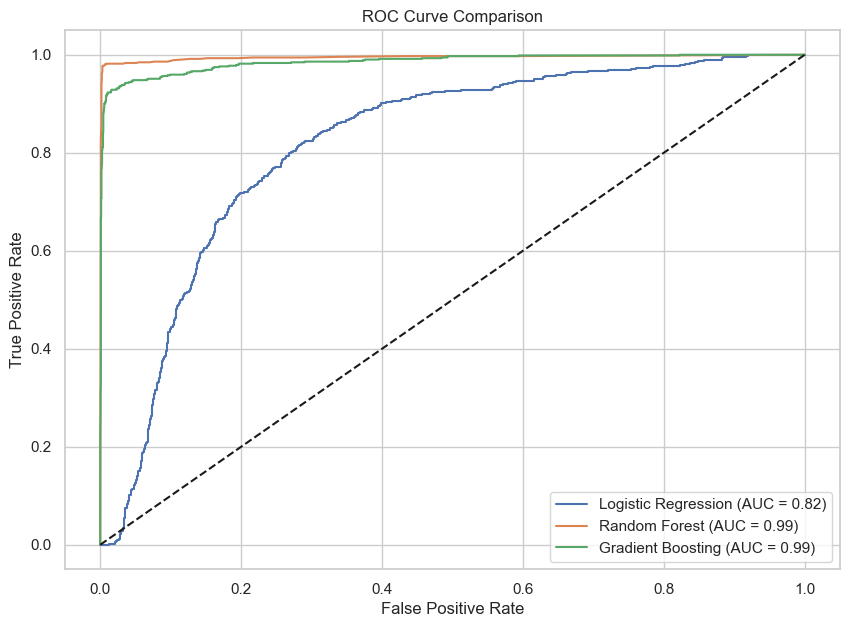

In [76]:
# Plot ROC Curve
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ROC/AUC Curve Analysis:
Logistic Regression: AUC = 0.82
Random Forest: AUC = 0.99
Gradient Boosting: AUC = 0.99

Higher AUC indicates better distinction between classes.
Both Random Forest and Gradient Boosting show excellent class separation.

Precision vs Recall – Which Metric to Prioritize?
Precision: Out of predicted positives, how many are actually positive?

Recall (Sensitivity): Out of actual positives, how many did we correctly identify?

In employee attrition prediction (as in this case with "left" as target):
Recall is more critical, especially for class 1 (employee leaving).
Missing an actual employee planning to leave (False Negative) is more costly than falsely predicting someone might leave (False Positive).
Because high recall ensures fewer missed actual leavers, helping HR proactively intervene.

Best Model: Random Forest Classifier
Justification:
Highest Recall (0.97) and Precision (1.00) on class 1.
Best AUC (0.99) — excellent at distinguishing between employees staying vs leaving.
Lowest False Negatives (only 232) compared to others.

## 7. Probability prediction using Best Model and Retention strategies

In [82]:

best_model = RandomForestClassifier(n_estimators = 100,random_state = 42)
best_model.fit(X_train_resampled, y_train_resampled)
# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (employee will leave)


In [88]:
#Categorize probabilities into zones
def risk_zone(prob):
    if prob < 0.2:
        return 'Safe Zone'
    elif prob < 0.6:
        return 'Low Risk Zone'
    elif prob < 0.9:
        return 'Medium Risk Zone'
    else:
        return 'High Risk Zone'
# Create result data frame
results_df = X_test.copy()
results_df["Actual_Left"] = y_test.values
results_df["Leave_Probability"] = y_probs
results_df["Risk_Zone"] = results_df["Leave_Probability"].apply(risk_zone)
#Display results
print(results_df[["Leave_Probability","Risk_Zone"]].head(50))


       Leave_Probability       Risk_Zone
10627               0.00       Safe Zone
2703                0.59   Low Risk Zone
6059                0.04       Safe Zone
3258                0.00       Safe Zone
4565                0.00       Safe Zone
4991                0.02       Safe Zone
13976               0.00       Safe Zone
9427                0.00       Safe Zone
7173                0.02       Safe Zone
13412               0.02       Safe Zone
14892               1.00  High Risk Zone
11861               0.02       Safe Zone
1246                1.00  High Risk Zone
12932               0.00       Safe Zone
5997                0.00       Safe Zone
14278               1.00  High Risk Zone
3664                0.00       Safe Zone
4266                0.00       Safe Zone
13383               0.00       Safe Zone
12238               1.00  High Risk Zone
11072               0.01       Safe Zone
14859               1.00  High Risk Zone
2752                0.03       Safe Zone
5889            

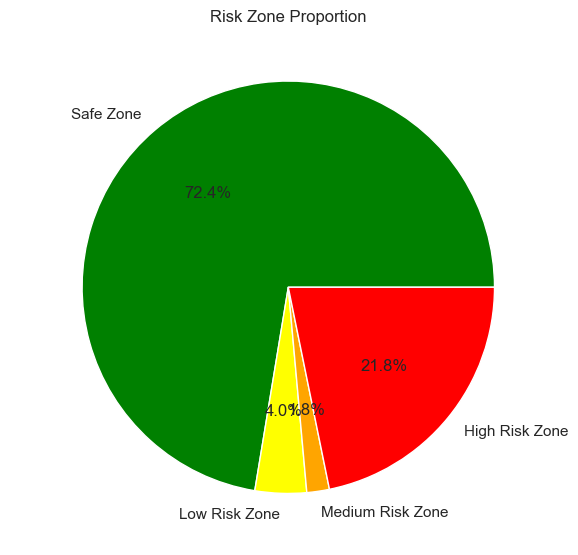

In [90]:
zone_counts = results_df["Risk_Zone"].value_counts().reindex(['Safe Zone','Low Risk Zone', 'Medium Risk Zone','High Risk Zone'])
plt.figure(figsize =(6,6))
zone_counts.plot.pie(autopct = '%1.1f%%',colors = ['green','yellow','orange','red'])
plt.title('Risk Zone Proportion')
plt.ylabel(" ")
plt.tight_layout()
plt.show()

          
           

Retention Strategies:
Safe Zone - Maintain and motivate
Keep engagement high by recognizing Good performance, career growth path feedback loop etc so that they wont slip into risk categories
Critical Risk Zone : identify reason for dissatisfaction and act fast
Identify overworked or underappreciated employees , offer customized retention plan etc
Low and Medium Risk Zone : Prevent then from slipping into critical zone
Launch skill building programs, Check if they are overloaded or no  work and allocate projects accordingly,offer small perks,
keep communication transparent